In [1]:
import uxarray as ux

import hvplot.pandas
import holoviews as hv

In [2]:
base_path = "../../test/meshfiles/ugrid/outCSne30/"
grid_path = base_path + "outCSne30.ug"
data_path = base_path + "outCSne30_vortex.nc"
uxds = ux.open_dataset(grid_path, data_path)
uxds

<xarray.UxDataset>
Dimensions:  (ncol: 5400)
Dimensions without coordinates: ncol
Data variables:
    psi      (ncol) float64 1.351 1.331 1.31 1.289 ... 0.7121 0.6909 0.67 0.6495

In [3]:
out = uxds['psi'].plot()

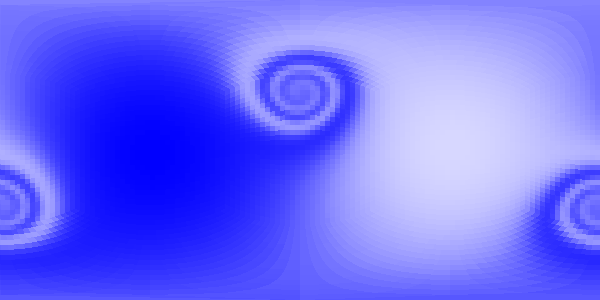

In [4]:
uxds['psi'].plot.raster()